In [1]:
# packages
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import pandas as pd
import numpy as np
import pickle

import src.preprocessing as prep

In [2]:
# remove coding_strand and intergenic from feature list since we filter for coding_strand == 1 and intergenic == 0 makes no sense to keep it
# we remove the distance_operon_perc and distance_start_codon_perc because they highly correlate with distance_operon and distance_start_codon
# we also remove dataset because otherwise it is not generalizable

#var_thr_seq_features = 0.1
#var_thr_tab_features = 1

file_genome = "../datasets/NC_000913.3.fasta"
file_wang = "../datasets/Wang_dataset.csv"
file_rousset_E18 = "../datasets/Rousset_LC_E18.csv"
file_rousset_E75 = "../datasets/Rousset_LC_E75.csv"

features_gene = ["gene_length", "gene_GC_content", "distance_operon", "operon_downstream_genes", "ess_gene_operon", "gene_expression_min", "gene_expression_max"]

features_guide = ["guide_GC_content", "distance_start_codon", "homopolymers", "MFE_hybrid_full", "MFE_hybrid_seed", "MFE_homodimer_guide", "MFE_monomer_guide", 
               "off_target_90_100", "off_target_80_90", "off_target_70_80", "off_target_60_70"]

add_features = ["geneid", "log2FC"]

100%|██████████| 244/244 [00:00<00:00, 1115.44it/s]


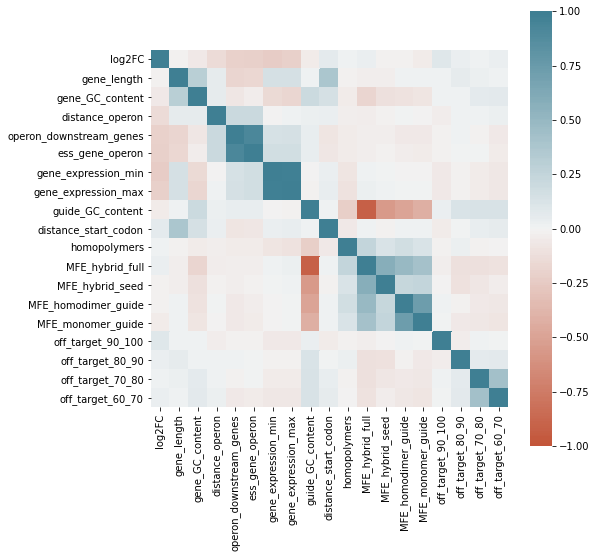

In [3]:
pd.set_option('mode.chained_assignment', None)

# load tabular data
data_wang_all = prep.preprocess_input_data(file_wang)
data_wang_all["sequence_40nt"] = prep.get_sequence(data_wang_all.copy(),file_genome,upstream=4,downstream=16)
data_wang_all = data_wang_all.sample(frac=1).reset_index(drop=True)

# filter out genes with low number of guides
genes_to_keep = prep.get_high_guide_genes(data_wang_all.copy())
data_wang_all = data_wang_all.loc[data_wang_all['geneid'].isin(genes_to_keep)]
data_wang_all.reset_index(inplace=True,drop=True)

# one-hot encoding and kmer for sequence features
one_hot_encoding_ML_wang = prep.one_hot_encode_ML(data_wang_all.copy())
one_hot_encoding_DL_wang = prep.one_hot_encode_DL(data_wang_all.copy())

kmer_2_wang = prep.get_kmer_table(data_wang_all.copy(),2)
kmer_3_wang = prep.get_kmer_table(data_wang_all.copy(),3)
kmer_4_wang = prep.get_kmer_table(data_wang_all.copy(),4)
kmer_wang = pd.concat([kmer_2_wang,kmer_3_wang,kmer_4_wang],axis=1)

# filter out features
data_wang = data_wang_all[add_features + features_gene + features_guide]

# plot correlation
plt.rcParams['figure.figsize'] = [8, 8]
sns.heatmap(data_wang.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)

# computation of gene effects
data_wang = prep.compute_gene_effect_median(data_wang.copy())
data_wang = prep.compute_gene_effect_normalized_rank(data_wang.copy())

pickle.dump(data_wang, open('../datasets/data_wang.pickle', 'wb'))
pickle.dump(one_hot_encoding_ML_wang, open('../datasets/one_hot_encoding_ML_wang.pickle', 'wb'))
pickle.dump(one_hot_encoding_DL_wang, open('../datasets/one_hot_encoding_DL_wang.pickle', 'wb'))
pickle.dump(kmer_wang, open('../datasets/kmer_wang.pickle', 'wb'))

100%|██████████| 147/147 [00:00<00:00, 1699.14it/s]


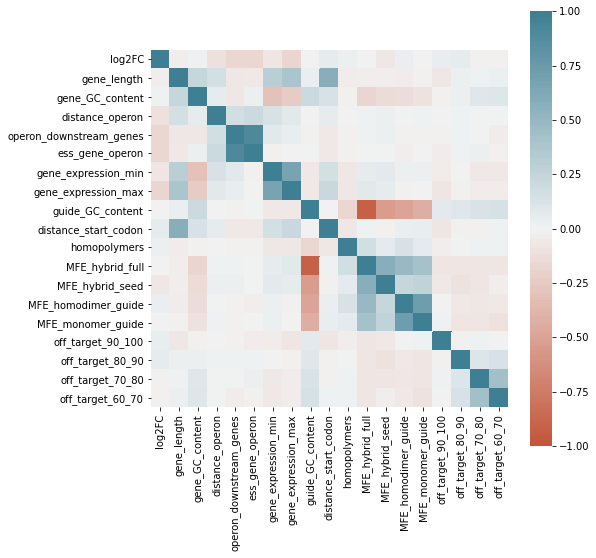

In [4]:
pd.set_option('mode.chained_assignment', None)

# load tabular data
data_rousset_E18_all = prep.preprocess_input_data(file_rousset_E18)
data_rousset_E18_all["sequence_40nt"] = prep.get_sequence(data_rousset_E18_all.copy(),file_genome,upstream=4,downstream=16)
data_rousset_E18_all = data_rousset_E18_all.sample(frac=1).reset_index(drop=True)

# filter out genes with low number of guides
genes_to_keep = prep.get_high_guide_genes(data_rousset_E18_all.copy())
data_rousset_E18_all = data_rousset_E18_all.loc[data_rousset_E18_all['geneid'].isin(genes_to_keep)]
data_rousset_E18_all.reset_index(inplace=True,drop=True)

# one-hot encoding and kmer for sequence features
one_hot_encoding_ML_rousset_E18 = prep.one_hot_encode_ML(data_rousset_E18_all.copy())
one_hot_encoding_DL_rousset_E18 = prep.one_hot_encode_DL(data_rousset_E18_all.copy())

kmer_2_rousset_E18 = prep.get_kmer_table(data_rousset_E18_all.copy(),2)
kmer_3_rousset_E18 = prep.get_kmer_table(data_rousset_E18_all.copy(),3)
kmer_4_rousset_E18 = prep.get_kmer_table(data_rousset_E18_all.copy(),4)
kmer_rousset_E18 = pd.concat([kmer_2_rousset_E18,kmer_3_rousset_E18,kmer_4_rousset_E18],axis=1)

# filter out features
data_rousset_E18 = data_rousset_E18_all[add_features + features_gene + features_guide]

# plot correlation
plt.rcParams['figure.figsize'] = [8, 8]
sns.heatmap(data_rousset_E18.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)

# computation of gene effects
data_rousset_E18 = prep.compute_gene_effect_median(data_rousset_E18.copy())
data_rousset_E18 = prep.compute_gene_effect_normalized_rank(data_rousset_E18.copy())
    
pickle.dump(data_rousset_E18, open('../datasets/data_rousset_E18.pickle', 'wb'))
pickle.dump(one_hot_encoding_ML_rousset_E18, open('../datasets/one_hot_encoding_ML_rousset_E18.pickle', 'wb'))
pickle.dump(one_hot_encoding_DL_rousset_E18, open('../datasets/one_hot_encoding_DL_rousset_E18.pickle', 'wb'))
pickle.dump(kmer_rousset_E18, open('../datasets/kmer_rousset_E18.pickle', 'wb'))

100%|██████████| 137/137 [00:00<00:00, 1381.78it/s]


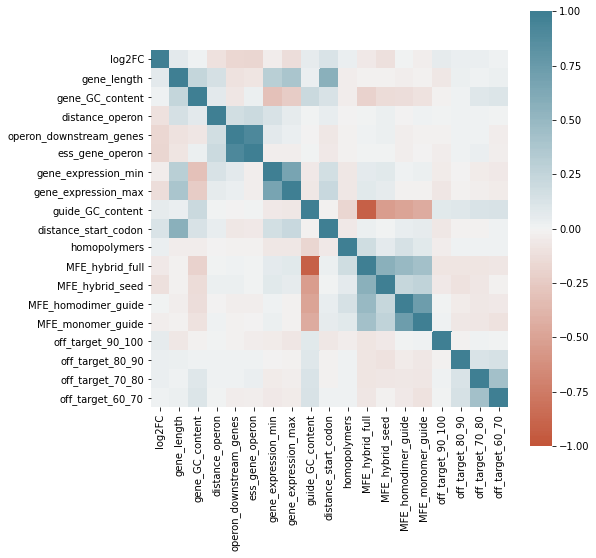

In [5]:
pd.set_option('mode.chained_assignment', None)

# load tabular data
data_rousset_E75_all = prep.preprocess_input_data(file_rousset_E75)
data_rousset_E75_all["sequence_40nt"] = prep.get_sequence(data_rousset_E75_all.copy(),file_genome,upstream=4,downstream=16)
data_rousset_E75_all = data_rousset_E75_all.sample(frac=1).reset_index(drop=True)

# filter out genes with low number of guides
genes_to_keep = prep.get_high_guide_genes(data_rousset_E75_all.copy())
data_rousset_E75_all = data_rousset_E75_all.loc[data_rousset_E75_all['geneid'].isin(genes_to_keep)]
data_rousset_E75_all.reset_index(inplace=True,drop=True)

# one-hot encoding and kmer for sequence features
one_hot_encoding_ML_rousset_E75 = prep.one_hot_encode_ML(data_rousset_E75_all.copy())
one_hot_encoding_DL_rousset_E75 = prep.one_hot_encode_DL(data_rousset_E75_all.copy())
kmer_2_rousset_E75 = prep.get_kmer_table(data_rousset_E75_all.copy(),2)
kmer_3_rousset_E75 = prep.get_kmer_table(data_rousset_E75_all.copy(),3)
kmer_4_rousset_E75 = prep.get_kmer_table(data_rousset_E75_all.copy(),4)
kmer_rousset_E75 = pd.concat([kmer_2_rousset_E75,kmer_3_rousset_E75,kmer_4_rousset_E75],axis=1)

# filter out features
data_rousset_E75 = data_rousset_E75_all[add_features + features_gene + features_guide] 

# plot correlation
plt.rcParams['figure.figsize'] = [8, 8]
sns.heatmap(data_rousset_E75.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)

# computation of gene effects
data_rousset_E75 = prep.compute_gene_effect_median(data_rousset_E75.copy())
data_rousset_E75 = prep.compute_gene_effect_normalized_rank(data_rousset_E75.copy())

pickle.dump(data_rousset_E75, open('../datasets/data_rousset_E75.pickle', 'wb'))
pickle.dump(one_hot_encoding_ML_rousset_E75, open('../datasets/one_hot_encoding_ML_rousset_E75.pickle', 'wb'))
pickle.dump(one_hot_encoding_DL_rousset_E75, open('../datasets/one_hot_encoding_DL_rousset_E75.pickle', 'wb'))
pickle.dump(kmer_rousset_E75, open('../datasets/kmer_rousset_E75.pickle', 'wb'))

In [6]:
#keep = prep.filter_by_variance(pd.concat([data_wang[features_gene_guide],data_rousset_E18[features_gene_guide],data_rousset_E75[features_gene_guide]],axis=0), var_thr_tab_features)